# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# The URL to make OpenWeatherMap API calls. 
weather_url = (f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}")

In [4]:

city_name = []
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
print(f"Beginning Data Retrieval\n"
        f"-------------------------")
record_count = 0
set_count = 1
for i, city in enumerate(cities):
    new_weather_url = weather_url + "&q=" + city.replace(" ","+")
    weather=requests.get(new_weather_url).json()
    record_count += 1
    if record_count == 50:
        record_count = 0
        set_count += 1
        time.sleep(60)
    try:
        
        city_name.append(weather['name']) 
        lat.append(weather['coord']['lat'])   
        lng.append(weather['coord']['lon'])
        max_temp.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity'])
        cloudiness.append(weather['clouds']['all'])
        wind_speed.append(weather['wind']['speed'])
        country.append(weather['sys']['country'])
        date.append(weather['sys']['sunrise'])
        
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except:
        print(f'City not found. Skipping...')

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | chumikan
Processing Record 3 of Set 1 | begun
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | nadym
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | mahibadhoo
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | yaransk
Processing Record 17 of Set 1 | maningrida
Processing Record 18 of Set 1 | provideniya
City not found. Skipping...
Processing Record 20 of Set 1 | alekseyevskaya
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 | port alfred
Processing Reco

Processing Record 5 of Set 5 | belyy yar
Processing Record 6 of Set 5 | norden
Processing Record 7 of Set 5 | san rafael
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 5 | teahupoo
Processing Record 10 of Set 5 | payson
Processing Record 11 of Set 5 | ribeira grande
City not found. Skipping...
Processing Record 13 of Set 5 | severnyy
Processing Record 14 of Set 5 | grand forks
Processing Record 15 of Set 5 | egvekinot
Processing Record 16 of Set 5 | naryan-mar
City not found. Skipping...
Processing Record 18 of Set 5 | maceio
Processing Record 19 of Set 5 | swan hill
Processing Record 20 of Set 5 | margate
Processing Record 21 of Set 5 | sao jose da coroa grande
Processing Record 22 of Set 5 | marfino
Processing Record 23 of Set 5 | talaya
Processing Record 24 of Set 5 | kemijarvi
Processing Record 25 of Set 5 | constitucion
Processing Record 26 of Set 5 | mantenopolis
Processing Record 27 of Set 5 | bubaque
Processing Record 28 of Set 5 | vakhrushev
Processing R

Processing Record 11 of Set 9 | tiznit
Processing Record 12 of Set 9 | kharitonovo
Processing Record 13 of Set 9 | srandakan
Processing Record 14 of Set 9 | kodinsk
Processing Record 15 of Set 9 | purranque
Processing Record 16 of Set 9 | wagar
Processing Record 17 of Set 9 | vysokogornyy
Processing Record 18 of Set 9 | mudon
Processing Record 19 of Set 9 | chuy
Processing Record 20 of Set 9 | swellendam
Processing Record 21 of Set 9 | saint anthony
Processing Record 22 of Set 9 | zavyalovo
Processing Record 23 of Set 9 | bengkulu
Processing Record 24 of Set 9 | sawakin
Processing Record 25 of Set 9 | kruisfontein
Processing Record 26 of Set 9 | mitsamiouli
Processing Record 27 of Set 9 | roding
Processing Record 28 of Set 9 | pietersburg
Processing Record 29 of Set 9 | sioux lookout
Processing Record 30 of Set 9 | nago
Processing Record 31 of Set 9 | kharan
Processing Record 32 of Set 9 | opuwo
Processing Record 33 of Set 9 | ulladulla
Processing Record 34 of Set 9 | anori
Processing 

Processing Record 12 of Set 13 | coahuayana
Processing Record 13 of Set 13 | atakpame
Processing Record 14 of Set 13 | kijang
Processing Record 15 of Set 13 | samarai
Processing Record 16 of Set 13 | aldan
Processing Record 17 of Set 13 | marsh harbour
Processing Record 18 of Set 13 | nanhai
Processing Record 19 of Set 13 | garowe
City not found. Skipping...
Processing Record 21 of Set 13 | cabinda
Processing Record 22 of Set 13 | savannah bight
Processing Record 23 of Set 13 | bilibino
Processing Record 24 of Set 13 | seafield
Processing Record 25 of Set 13 | tianpeng
City not found. Skipping...
Processing Record 27 of Set 13 | changji


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df =pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, 
                              "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,54.81,86,1,6.29,ZA,1661145301
1,Chumikan,54.7183,135.3150,57.47,73,100,15.12,RU,1661111179
2,Begūn,24.9833,75.0000,73.53,94,81,7.40,IN,1661128616
3,Avarua,-21.2078,-159.7750,75.25,88,100,14.97,CK,1661101057
4,Nadym,65.5333,72.5167,49.75,84,100,2.80,RU,1661123626


In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,19.469189,20.678671,67.625672,71.326353,54.041885,7.465812,1.655310e+09
std,33.460212,90.675535,13.834727,19.614643,39.141151,5.014837,9.805183e+07
min,-54.800000,-179.166700,34.660000,3.000000,0.000000,0.000000,0.000000e+00
25%,-8.897800,-60.145800,56.340000,62.000000,11.000000,3.710000,1.661081e+09
50%,24.800000,26.891000,69.750000,76.000000,62.000000,6.150000,1.661114e+09
75%,47.866700,102.265500,78.400000,85.000000,96.000000,10.490000,1.661131e+09
max,78.218600,179.316700,101.880000,100.000000,100.000000,28.570000,1.661191e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

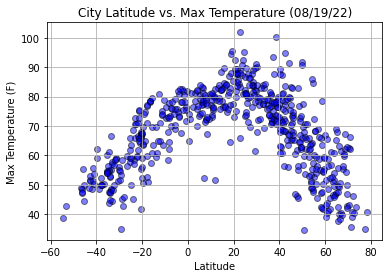

In [41]:
# This plot is analyzing the relationship between latitude and max temperature for select cities around the world. 
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], c='b', edgecolors='k', alpha=0.5)
plt.title("City Latitude vs. Max Temperature (08/19/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("latitude_vs_max_temp.png")

## Latitude vs. Humidity Plot

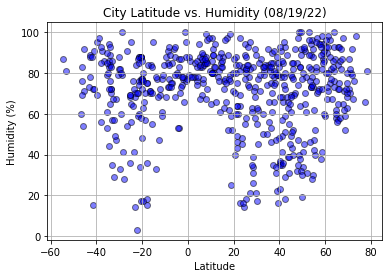

In [42]:
# This plot is analyzing the relationship between latitude and humidity for select cities aroound the world. 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], c='b', edgecolors='k', alpha=0.5)
plt.title("City Latitude vs. Humidity (08/19/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("latitude_vs_humidity.png")

## Latitude vs. Cloudiness Plot

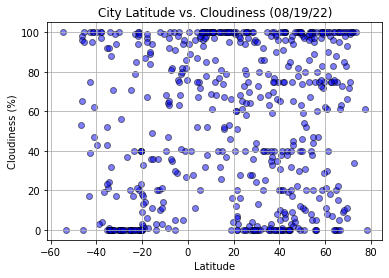

In [43]:
# This plot is analyzing the relationship between latitude and cloudiness for select cities around the world.
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], c='b', edgecolors='k', alpha=0.5)
plt.title("City Latitude vs. Cloudiness (08/19/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

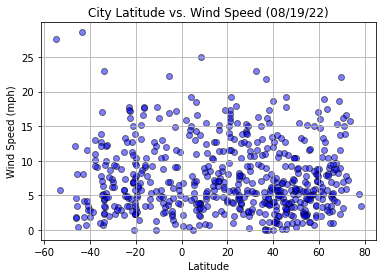

In [44]:
# This plot is analyzing the relationship between latitude and wind speed for select cities around the world.
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], c='b', edgecolors='k', alpha=0.5)
plt.title("City Latitude vs. Wind Speed (08/19/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("latitude_vs_wind_speed.png")

## Linear Regression

In [13]:
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
northern_hemisphere
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,54.81,86,1,6.29,ZA,1661145301
3,Avarua,-21.2078,-159.7750,75.25,88,100,14.97,CK,1661101057
5,Esperance,-33.8667,121.9000,52.75,65,100,23.00,AU,1661120643
6,Hobart,-42.8794,147.3294,51.66,89,75,8.05,AU,1661115269
9,Bluff,-46.6000,168.3333,48.79,60,53,12.12,NZ,1661110597
...,...,...,...,...,...,...,...,...,...
551,Tutóia,-2.7619,-42.2744,78.30,78,80,9.06,BR,1661071885
553,Cradock,-32.1642,25.6192,50.09,29,0,4.79,ZA,1661143613
554,Rundu,-17.9333,19.7667,52.63,15,99,5.73,NA,1661144162
562,Samarai,-10.6167,150.6667,78.89,84,99,17.72,PG,1661112372


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7040243858613956


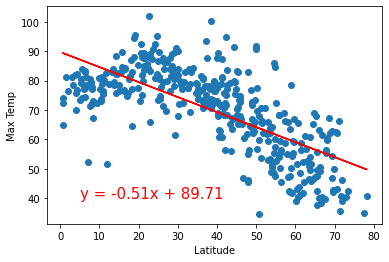

In [48]:
# This plot shows a negative correlation between the latitudes of select cities in the Northern Hemisphere and their max \
# temperatures.
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(northern_hemisphere["Lat"], regress_values, "r-")

plt.annotate(line_equation, (5,40), fontsize=15, color="red")
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7040243858613956


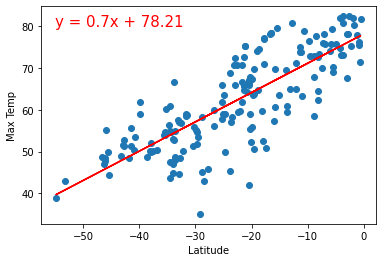

In [49]:
# This plot shows a positive correlation between the latitudes of select cities in the Southern Hemisphere and their max \
# temperatures.
print(f"The r-value is: {rvalue}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(southern_hemisphere["Lat"], regress_values, "r-")

plt.annotate(line_equation, (-55,80), fontsize=15, color="red")
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.8038609198878975


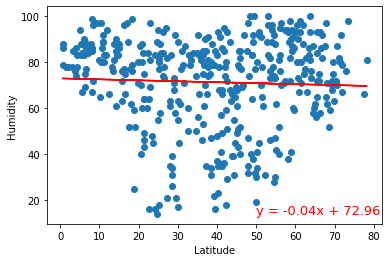

In [50]:
# This plot shows little correlation between the latitudes select cities in the Northern Hemisphere and their humidities.
print(f"The r-value is: {rvalue}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(northern_hemisphere["Lat"], regress_values, "r-")

plt.annotate(line_equation, (50,14), fontsize=13, color="red")
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.04112407928987623


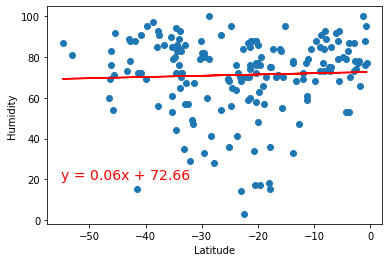

In [51]:
# This plot shows little correlation between the latitudes of select cities in the Southern Hemisphere and their humidities.
print(f"The r-value is: {rvalue}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(southern_hemisphere["Lat"], regress_values, "r-")

plt.annotate(line_equation, (-55,20), fontsize=14, color="red")
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04166260681318161


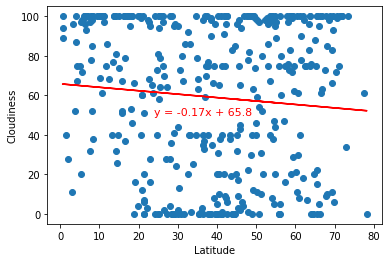

In [52]:
# This plot shows a slightly negative correlation between the latitudes of select cities in the Northern Hemisphere and their \
# levels of cloudiness. 
print(f"The r-value is: {rvalue}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(northern_hemisphere["Lat"], regress_values, "r-")

plt.annotate(line_equation, (24,50), fontsize=11, color="red")
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.08974809565044489


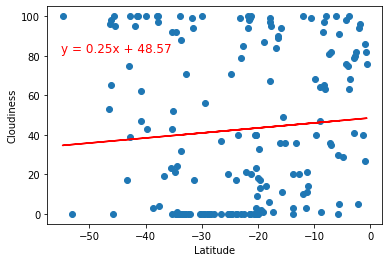

In [53]:
# This plot shows a slightly positive correlation between the latitudes of select cities in the Southern Hemisphere and their \
# levels of cloudiness. 
print(f"The r-value is: {rvalue}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(southern_hemisphere["Lat"], regress_values, "r-")

plt.annotate(line_equation, (-55,82), fontsize=12, color="red")
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08266221651952213


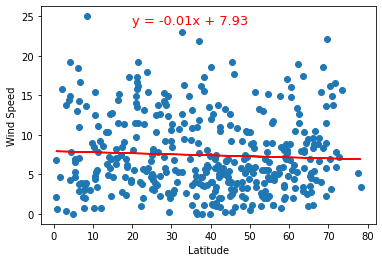

In [54]:
# This plot shows almost no correlation between the latitudes of select cities in the Northern Hemisphere and their wind \
# speeds in mph. 
print(f"The r-value is: {rvalue}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(northern_hemisphere["Lat"], regress_values, "r-")

plt.annotate(line_equation, (20,24), fontsize=13, color="red")
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0514039379272168


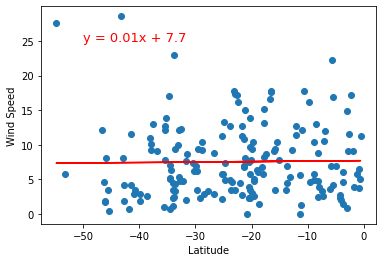

In [55]:
# This plot shows almost no correlation between the latitudes of select cities in the Southern Hemisphere and their wind \
# speeds in mph. 
print(f"The r-value is: {rvalue}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(southern_hemisphere["Lat"], regress_values, "r-")

plt.annotate(line_equation, (-50,25), fontsize=13, color="red")
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [36]:
weather_df.to_csv('city_data.csv')

## Observations
From the above code, three observations can be drawn:
1. As latitude increases in the Northern Hemisphere (moving closer towards the North Pole), the max temperature decreases.
2. As latitude increases in the Southern Hemisphere (moving closer towards the Equator), the max temperature increases.
3. As latitude increases in the Southern Hemisphere (moving closer towards the Equator), the cloudiness increases slightly. 